In [1]:
import pandas as pd
df = pd.read_csv('04_combine_all.tsv', sep='\t')

In [2]:
df.groupby('dept').size()

dept
STT_AB     75353
STT_CS     44021
STT_MV    245303
STT_NS     70769
STT_TT    369028
dtype: int64

In [3]:
df['char_len'] = df['uni'].str.len()

In [4]:
df['char_len'].describe()

count    804474.000000
mean         66.152022
std          49.493217
min           1.000000
25%          28.000000
50%          53.000000
75%          93.000000
max         516.000000
Name: char_len, dtype: float64

<Axes: >

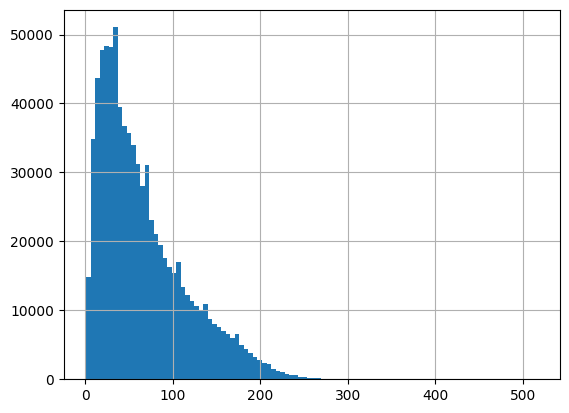

In [5]:
df['char_len'].hist(bins=100)

<Axes: >

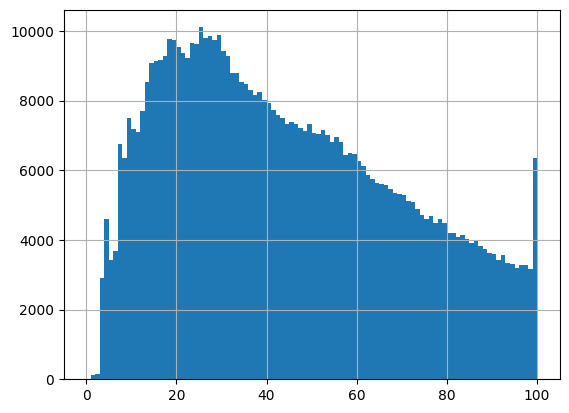

In [6]:
df['char_len'].hist(bins=100, range=(0, 100))

In [7]:
df = df[(df['char_len'] < 80) & (df['char_len'] > 15)]

In [8]:
df.groupby('dept').size()

dept
STT_AB     44373
STT_CS     18277
STT_MV    127287
STT_NS     16800
STT_TT    261560
dtype: int64

In [9]:
depts = df['dept'].unique()

In [10]:
benchmarks = []
for dept in depts:
    print(dept)
    df_dept = df[df['dept'] == dept]
    df_dept = df_dept.sort_values('grade', ascending=False)
    df_dept = df_dept[0:1000]
    benchmarks.append(df_dept)

STT_AB
STT_NS
STT_TT
STT_CS
STT_MV


In [11]:
benchmarks = pd.concat(benchmarks)

In [12]:
benchmarks.head()

,file_name,uni,wylie,url,dept,grade,char_len
515126,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36
140345,STT_AB00225_0051_634428_to_636220,དེ་སྔ་ཡིན་ན་པད་ཁའི་མེ་ཏོག་གིས་,de snga yin na pad kha'i me tog gis,https://huggingface.co/datasets/openpecha/STT_...,STT_AB,3,31
166731,STT_AB00277_0455_2502107_to_2503882,གཟུགས་སྐུ་སྤྱི་ཙམ་ལ་སྤྲུལ་སྐུ་དང་།,gzugs sku spyi tsam la sprul sku dang /,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,35
548584,STT_AB00211_0052_282124_to_285981,སྐྱེ་བ་འདི་གཅིག་པུ་ཙམ་མ་ཡིན་པར། སྔོན་གྱི་སྐྱེ་...,skye ba 'di gcig pu tsam ma yin par/_sngon gyi...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,59
254533,STT_AB00166_0076_222690_to_224429,གཡུལ་འགྱེད་ཚེ་ན་གནོད་པ་མང་།།,g.yul 'gyed tshe na gnod pa mang /[ ]/,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,29


In [13]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1000
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [14]:
sample = 3
for dept in depts:
    print(dept)
    df_dept = benchmarks[benchmarks['dept'] == dept]
    df_dept = df_dept.sample(frac=1)
    for i in range(0, sample):
        print(df_dept.iloc[i]['uni'], df_dept.iloc[i]['url'])

STT_AB
བསམ་བརླག་དེ་ནི་སྦྱིན་པ་བྱེད་ཀྱང་སློང་བ་དག་དང་མཚུངས་སོ་ཞེས།།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0560_2439530_to_2443523.wav
ཕྱིའི་དངོས་པོ་མི་གཏོང་བའི་ཚུལ་དང་། ཕྱིའི་དངོས་པོ་གཏོང་བའི་ཚུལ་ལོ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0765_3295162_to_3299701.wav
དེ་ཆེད་དུ་བྱས་ལ་བསྟེན་དུ་མི་རུང་ངོ་།།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2552_9484001_to_9486578.wav
STT_NS
དེ་རེད་དངོས་གནས་གསུམ། ད་དེང་སང་ད་ང་རང་གི་མཐོང་སྟངས་ལ་བལྟས་ནས་རེད་འ་ཡ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0175_0131_987803_to_992612.wav
ཆེད་དུ་རང་དངོས་གནས་སྦྱངས་ངེ་ཡིན་ན་ཡོད་ཨ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0198_0180_1586154_to_1588213.wav
རེད་རེད། ཨེ་ནས་ཡང་ཁྱེད་རང་འདི། འདི་ཧ་གོ་ཡིས་ཡོད་བའི། ད་ལྟ་ག་རེ་ལབ་དགོས་རེད།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0081_0170_1184430_to_1187789.wav
STT_TT
བྱས་དུས། ཨོམ། ཡོན་ཏན་ཐམས་ཅད་ཀྱི་གཞི་རྟེན་འདྲ་བོ་རེད་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00035_01945.400-01948.650.wav
ཨེ་

In [15]:
def parse_cs_file_name(code):
    
    try:
        # Split the code into parts
        parts = code.split('-')

        # Decode each part of the code
        
        data_type = {'X': 'non-designated', 'D': 'story-telling', 'L':'conversation'}.get(parts[1], 'Unknown')
        birth_year = parts[2][:4]
        gender = {'P': 'male', 'M': 'female', 'X': 'other'}.get(parts[3][:1], 'Unknown')
        location = {'D': 'Dharamsala', 'S': 'South India', 'L': 'Ladakh', 'N': 'Nepal'}.get(parts[4][:1], 'Unknown')
        education_type = parts[5][0]
        education_years = parts[5][1:3]
        grade_level = parts[6][:1]
        school_code = parts[7][:1]

        # Create a dictionary with the decoded values
        decoded = {
            'data_type': data_type,
            'birth_year': int(birth_year),
            'age': 2023 - int(birth_year),
            'gender': gender,
            'location': location,
            'education_type': education_type,
            'education_years': int(education_years),
            'grade_level': int(grade_level),
            'school_code': school_code
        }
    except:
        print(f'Error decoding {code}')
        return {}
    return decoded

# Example usage
codes = [
    'STT_CS-D-2016-M-D-B04-1-R-06_0017_147090_to_156979',
    'STT_CS-X-2014-M-D-B02-4-R-01_0110_1035711_to_1037787',
    'STT_CS-L-2014/2014-P/P-D/D-B03/B06-5/5-R/R-01_0129_1106637_to_1112914.mp3',
]

for code in codes:
    print(parse_cs_file_name(code))


{'data_type': 'story-telling', 'birth_year': 2016, 'age': 7, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 4, 'grade_level': 1, 'school_code': 'R'}
{'data_type': 'non-designated', 'birth_year': 2014, 'age': 9, 'gender': 'female', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 2, 'grade_level': 4, 'school_code': 'R'}
{'data_type': 'conversation', 'birth_year': 2014, 'age': 9, 'gender': 'male', 'location': 'Dharamsala', 'education_type': 'B', 'education_years': 3, 'grade_level': 5, 'school_code': 'R'}


In [16]:
benchmarks_cs = benchmarks[benchmarks['dept'] == 'STT_CS']

In [17]:
benchmarks_cs_parsed = benchmarks_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
benchmarks_cs = pd.concat([benchmarks_cs, benchmarks_cs_parsed], axis=1)

In [18]:
benchmarks_cs.groupby('education_years').size()

education_years
1    268
2    244
3    124
4     73
5    114
6      1
7     93
8     51
9     32
dtype: int64

In [19]:
benchmarks_cs.groupby('school_code').size()

school_code
B      1
R    897
T    102
dtype: int64

In [20]:
df_cs = df[df['dept'] == 'STT_CS']

In [21]:
df_cs = df_cs.sort_values('grade', ascending=False)

In [22]:
df_cs_parsed = df_cs['file_name'].apply(lambda x: pd.Series(parse_cs_file_name(x)))
df_cs = pd.concat([df_cs, df_cs_parsed], axis=1)

Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0150_1172618_to_1175234
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0151_1177731_to_1186995
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0152_1193847_to_1197002
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0153_1201305_to_1203600
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0154_1214873_to_1219227
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0155_1221049_to_1224492
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0147_1149499_to_1152199
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0148_1160907_to_1167555
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0096_724350_to_727557
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0087_665507_to_668342
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01B_0088_672173_to_674299
Error decoding STT_CS-L-2018_2018_M_M-D_D-B05_B05-3_3-R_R-01

In [23]:
df_cs.groupby('education_years').size()

education_years
0.0       9
1.0    2728
2.0    3686
3.0    2694
4.0    2971
5.0    2346
6.0    1509
7.0     750
8.0     688
9.0     414
dtype: int64

In [24]:
df_cs.groupby('school_code').size()

school_code
0        7
B       48
K       18
R    16364
T      649
Y      656
r       53
dtype: int64

In [25]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 6][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['education_years'] == 9][:60]])

In [26]:
benchmarks_cs.groupby('education_years').size()

education_years
1.0    268
2.0    244
3.0    124
4.0     73
5.0    114
6.0    101
7.0     93
8.0     51
9.0     92
dtype: int64

In [27]:
missing_school_codes = ['0','B','K','Y','r']

In [28]:
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == '0'][:7]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'B'][:40]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'K'][:10]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'Y'][:100]])
benchmarks_cs = pd.concat([benchmarks_cs, df_cs[df_cs['school_code'] == 'r'][:50]])

In [29]:
benchmarks_cs.groupby('school_code').size()

school_code
0       7
B      41
K      10
R    1057
T     102
Y     100
r      50
dtype: int64

In [30]:
benchmarks = pd.concat([benchmarks[benchmarks['dept'] != 'STT_CS'], benchmarks_cs])

In [31]:
benchmarks.shape

(5367, 16)

In [32]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1367
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [33]:
benchmarks.to_csv('05_benchmarks.tsv', sep='\t', index=False)